# EDA + Model building in Depth On Heart Disease

### Objective : 
Main obejctive behind this notebook is to give an idea along with workflow of Machine Learning Processes.

Starting from **Getting data informaion to Exploratory Data Analysis, Data Manipulation, Building and then Validation of Model.**

I am trying to keep it as **simple** as i can so that newbie can also understand the workflow.

If you learn anything useful from this notebook then **Give Upvote :)
** All **QUESTION/DOUBTS/SUGGESTIONS** are welcomed here


## Contents of the Notebook:

#### Part1: Exploratory Data Analysis(EDA):
1)Analysis of the features.

2)Finding any relations or trends considering multiple features.
#### Part2: Data Cleaning:
1)Adding any few features if any.

2)Removing redundant features.

3)Converting features into suitable form for modeling.
#### Part3: Predictive Modeling
1)Running Basic Algorithms.

2)Cross Validation.

3)Important Features Extraction.

4)Plotting ROC Curve, Precision/Recall Curve, AUC

4)Model Comparison (Accuracy + F1 Score)

## Part1: Exploratory Data Analysis(EDA)

#### Attribute Information:
    1. age                                                  2. sex
    3. chest pain type (4 values)                           4. resting blood pressure
    5. serum cholestoral in mg/dl                           6. fasting blood sugar > 120 mg/dl
    7. resting electrocardiographic results (values 0,1,2)  8. maximum heart rate achieved
    9. exercise induced angina                              10. oldpeak = ST depression induced by exercise relative to rest
    11. the slope of the peak exercise ST segment           12. number of major vessels (0-3) colored by flourosopy
    13. thal: 3 = normal; 6 = fixed defect; 
            7 = reversable defect                           14. target column

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
color=sns.color_palette()

In [2]:
data=pd.read_csv('../input/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### How many people are suffering from Heart Disease ?

Text(0.5, 1.0, 'Heart Disease')

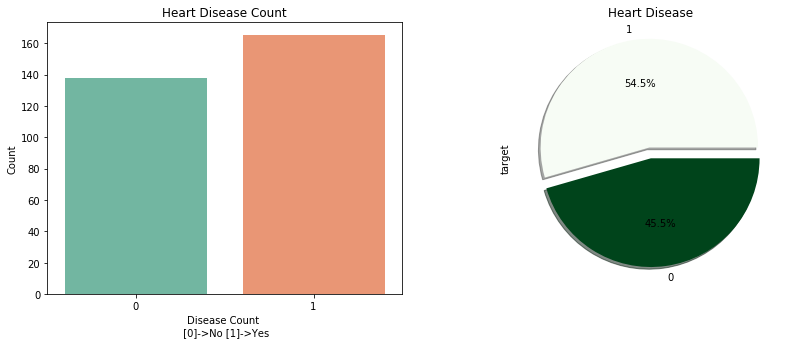

In [3]:
fig,ax=plt.subplots(1, 2, figsize = (14,5))
sns.countplot(data=data, x='target', ax=ax[0],palette='Set2')
ax[0].set_xlabel("Disease Count \n [0]->No [1]->Yes")
ax[0].set_ylabel("Count")
ax[0].set_title("Heart Disease Count")
data['target'].value_counts().plot.pie(explode=[0.1,0.0],autopct='%1.1f%%',ax=ax[1],shadow=True, cmap='Greens')
plt.title("Heart Disease")

From above graph we can say that more than half of the population suffering from Heart Disease with parcentage of 54.5%. 

Let's explore more feature to get more insight from dataset

### Feature analysis

### a)->SEX (Category)

Text(0.5, 1.0, '0 ->Female , 1 -> Male')

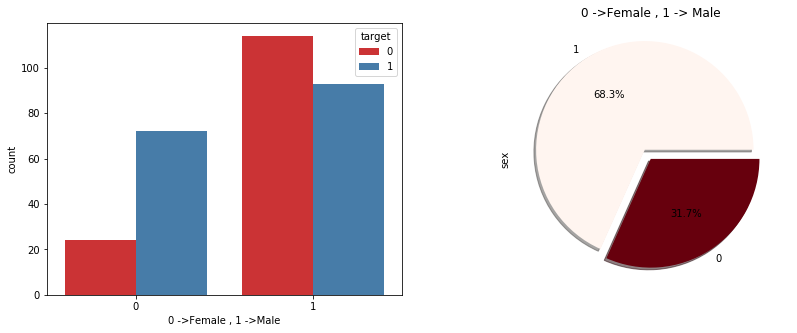

In [4]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='sex',data=data,hue='target',palette='Set1',ax=ax[0])
ax[0].set_xlabel("0 ->Female , 1 ->Male")
data.sex.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0], cmap='Reds')
ax[1].set_title("0 ->Female , 1 -> Male")

**This is interesting**

**Number of Women suffering from Heart Disease are more than Men** but **Men population is more than Women**. We will use these insight for our model developement.

Let's explore other feature

### b)-> fasting blood sugar (Fbs) (Category)

Text(0.5, 1.0, '0 -> fps <120 , 1 -> fps>120')

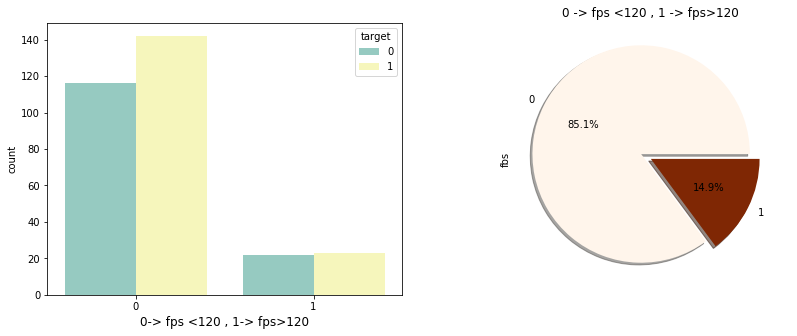

In [5]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='fbs',data=data,hue='target',palette='Set3',ax=ax[0])
ax[0].set_xlabel("0-> fps <120 , 1-> fps>120",size=12)
data.fbs.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0],cmap='Oranges')
ax[1].set_title("0 -> fps <120 , 1 -> fps>120",size=12)

This is weird **People having fps < 120 have more chance of having Heart Disease than people havnig fps >120**

This insight will also be useful for our model

Let's explore more

### c) resting electrocardiographic results (values 0,1,2) (Category)

Text(0.5, 1.0, 'resting electrocardiographic')

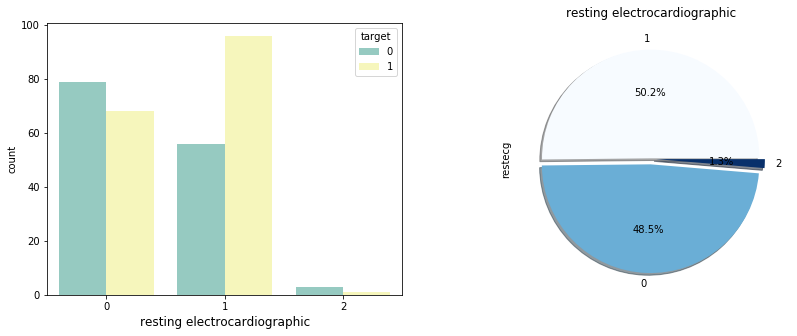

In [6]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='restecg',data=data,hue='target',palette='Set3',ax=ax[0])
ax[0].set_xlabel("resting electrocardiographic",size=12)
data.restecg.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,
                                     explode=[0.005,0.05,0.05],cmap='Blues')
ax[1].set_title("resting electrocardiographic",size=12)

An electrocardiogram (ECG) is a test which measures the electrical activity of your heart to show whether or not it is working normally. An ECG records the heart's rhythm and activity on a moving strip of paper or a line on a screen. -> **THANKS GOOGLE**

With above graph as a refrence we can **if resting electrocardiographic is 1 then person have more chances of suffering from Heart Disease**

### d) the slope of the peak exercise ST segment (slope)(Category)

Text(0.5, 1.0, 'peak exercise ST segment ')

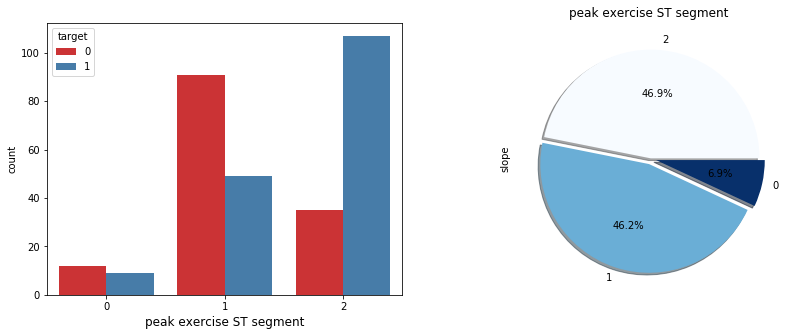

In [7]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='slope',data=data,hue='target',palette='Set1',ax=ax[0])
ax[0].set_xlabel("peak exercise ST segment",size=12)
data.slope.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,explode=[0.005,0.05,0.05],cmap='Blues')

ax[1].set_title("peak exercise ST segment ",size=12)

Feature (the peak exercise ST segment slope) has three symbolic values (flat, up sloping, downsloping)


Therefore **People having up sloping are more prone to Heart Disease than flat and downsloping**. This is useful for our model

### e)  number of major vessels colored by flourosopy (category)

Text(0.5, 1.0, 'number of major vessels colored by flourosopy')

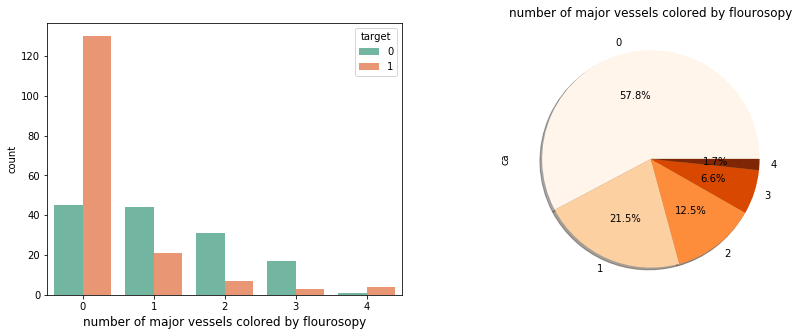

In [8]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='ca',data=data,hue='target',palette='Set2',ax=ax[0])
ax[0].set_xlabel("number of major vessels colored by flourosopy",size=12)
data.ca.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,cmap='Oranges')
ax[1].set_title("number of major vessels colored by flourosopy",size=12)

Since **Fluoroscopy** use to  produce x-ray which will makes possible to see internal organs in motion. Fluoroscopy uses x-ray to produce real-time video images.

**THIS seems to be important info from data** 

### f) thal 3 = normal, 6 = fixed defect, 7 = reversable defect (category feature)

Text(0.5, 1.0, 'number of major vessels colored by flourosopy')

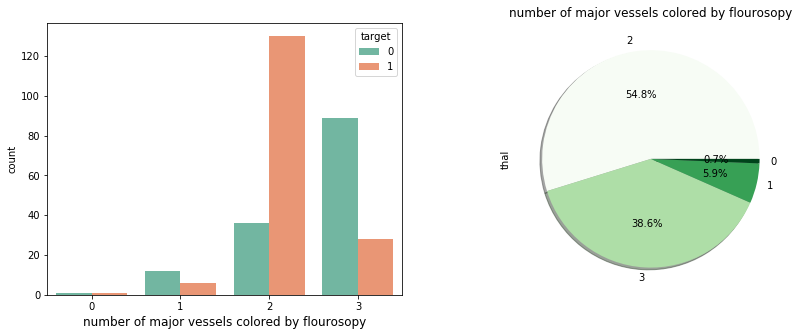

In [9]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='thal',data=data,hue='target',palette='Set2',ax=ax[0])
ax[0].set_xlabel("number of major vessels colored by flourosopy",size=12)
data.thal.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,cmap='Greens')
ax[1].set_title("number of major vessels colored by flourosopy",size=12)

### g) Chest Pain (category)

Text(0.5, 1.0, 'Chest pain')

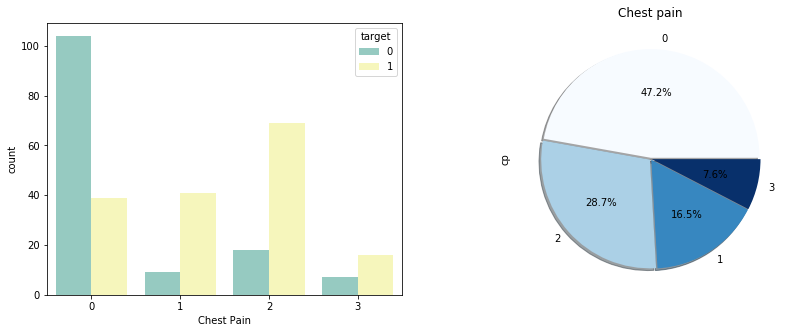

In [10]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='cp',data=data,hue='target',palette='Set3',ax=ax[0])
ax[0].set_xlabel("Chest Pain")
data.cp.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',explode=[0.01,0.01,0.01,0.01],shadow=True, cmap='Blues')
ax[1].set_title("Chest pain")

4-Levels of chest pain given in data where 3 is highest

**People who are on 3rd level of chest pain are very less as compared to people who are on 2nd level of chest pain**. 
I guess **Most people died after 2nd level of chest pain**

This insight will be very usefull for our model

### Let's explore Continuous data now with categorical and ordinal data

### h) Trestbps (continuous feature)

Text(0.5, 1.0, 'Trestbps V/S CA (Major Vessel Coloured)')

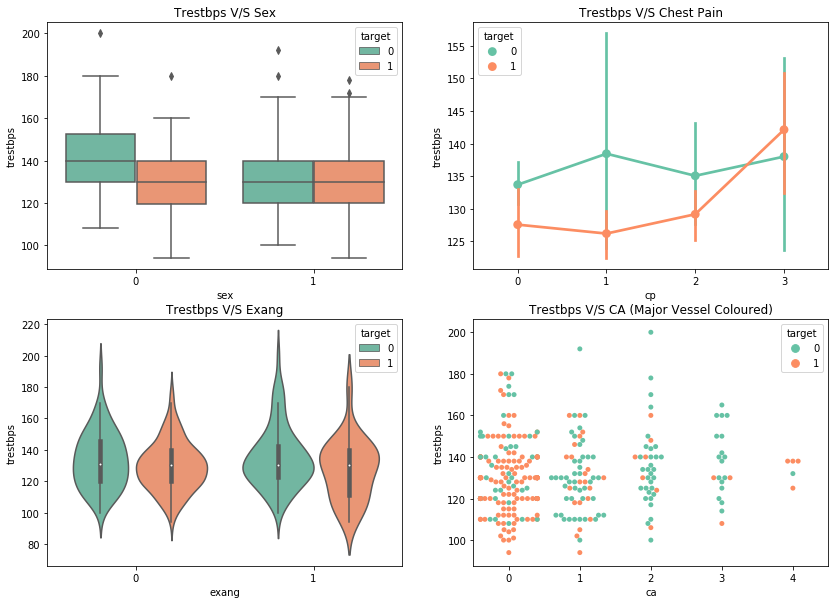

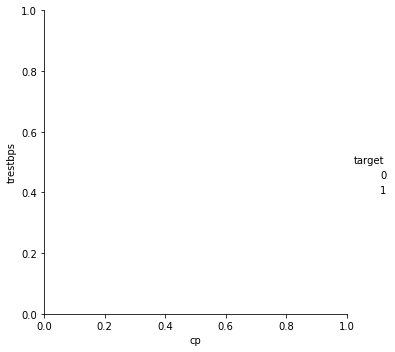

In [11]:
fig,ax=plt.subplots(2,2,figsize=(14,10))
sns.boxplot(y='trestbps',data=data,x='sex',hue='target',palette='Set2',ax=ax[0,0])
ax[0,0].set_title("Trestbps V/S Sex")
sns.factorplot(y='trestbps',data=data,x='cp',hue='target',ax=ax[0,1],palette='Set2')
ax[0,1].set_title("Trestbps V/S Chest Pain")
sns.violinplot(y='trestbps',data=data,x='exang',hue='target',ax=ax[1,0],palette='Set2')
ax[1,0].set_title("Trestbps V/S Exang")
sns.swarmplot(y='trestbps',data=data,x='ca',hue='target',ax=ax[1,1],palette='Set2')
ax[1,1].set_title("Trestbps V/S CA (Major Vessel Coloured)")

Based on above analysis we can say that Gender plays minor role with respect to Blood Pressure (trestbps). But **Chest Pain play's Vital Role** . As Chest pain increases Blood Pressure will also increases along with chances of Heart Diseases.

Lets Move to other features

### i) Cholestrol (continuous feature)

Text(0.5, 1.0, 'Cholestrol V/S Thal')

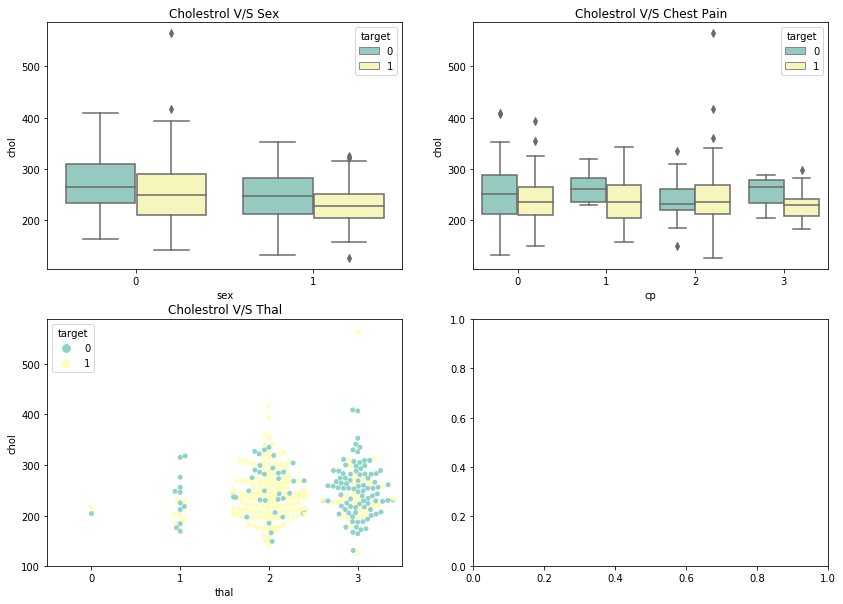

In [12]:
fig,ax=plt.subplots(2,2,figsize=(14,10))
sns.boxplot(y='chol',data=data,x='sex',hue='target',palette='Set3',ax=ax[0,0])
ax[0,0].set_title("Cholestrol V/S Sex")
sns.boxplot(y='chol',data=data,x='cp',hue='target',ax=ax[0,1],palette='Set3')
ax[0,1].set_title("Cholestrol V/S Chest Pain")
sns.swarmplot(y='chol',data=data,x='thal',hue='target',ax=ax[1,0],palette='Set3')
ax[1,0].set_title("Cholestrol V/S Thal")

Female have **higher cholestrol level** than Men. Chances of **Heart Diseases** decreases with decrease in **Cholestrol level**.

With 2nd Graph (Cholestrol V/S Chest Pain) we can say that if **cholestrol is less than 240 approx** and **Chest pain is at level 3~4 then chances of having heart diseases are higher**

### j) Oldpeak (continuous feature)

Text(0.5, 1.0, 'oldpeak V/S CA')

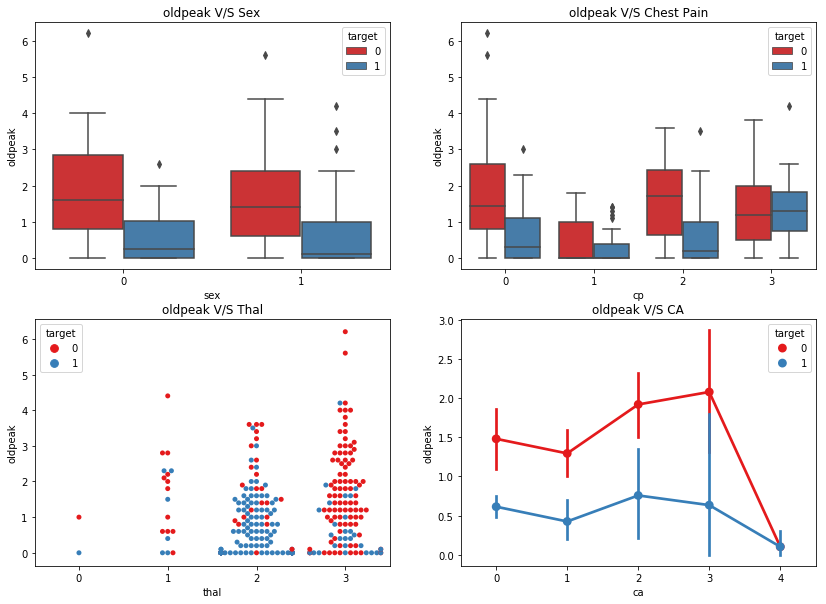

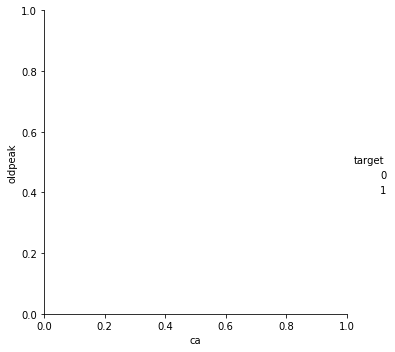

In [13]:
fig,ax=plt.subplots(2,2,figsize=(14,10))
sns.boxplot(y='oldpeak',data=data,x='sex',hue='target',palette='Set1',ax=ax[0,0])
ax[0,0].set_title("oldpeak V/S Sex")
sns.boxplot(y='oldpeak',data=data,x='cp',hue='target',ax=ax[0,1],palette='Set1')
ax[0,1].set_title("oldpeak V/S Chest Pain")
sns.swarmplot(y='oldpeak',data=data,x='thal',hue='target',ax=ax[1,0],palette='Set1')
ax[1,0].set_title("oldpeak V/S Thal")
sns.factorplot(y='oldpeak',data=data,x='ca',hue='target',ax=ax[1,1],palette='Set1')
ax[1,1].set_title("oldpeak V/S CA")

Based on above plots we can comclude that if Old peak is less then people will have more chances of **having heart diseases**

### Let's do some Advanced EDA now 

### Distribution of each features

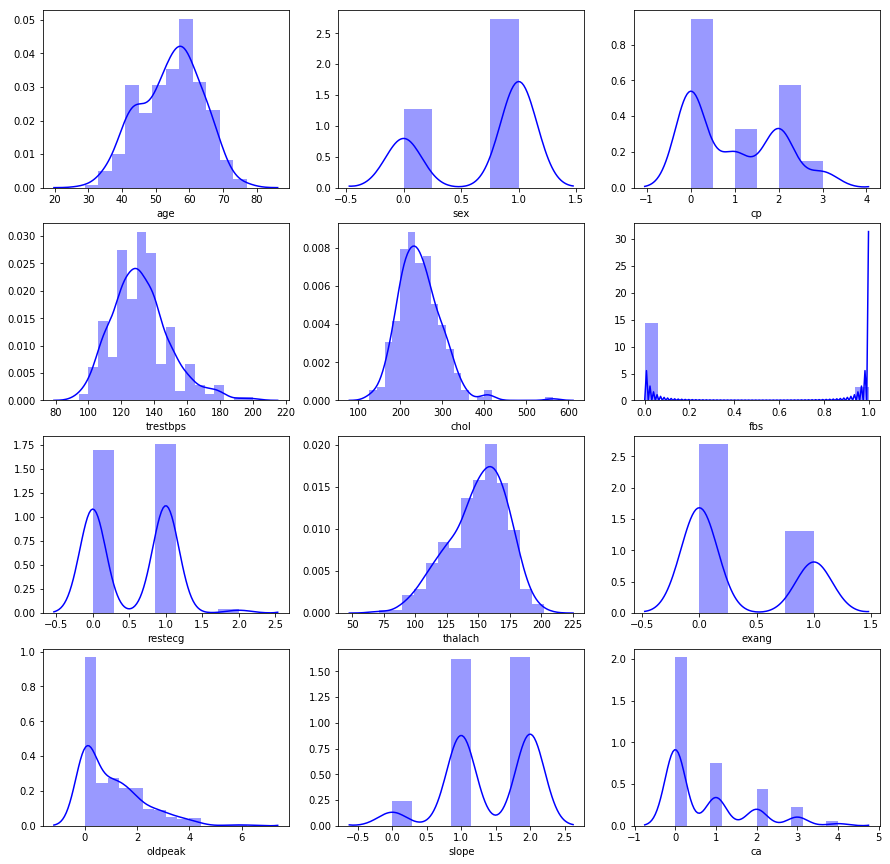

In [14]:
fig,ax=plt.subplots(4,3,figsize=(15,15))
for i in range(12):
    plt.subplot(4,3,i+1)
    sns.distplot(data.iloc[:,i],kde=True, color='blue')

### PLOT WITH RESPECT TO MEAN OF EACH ROW

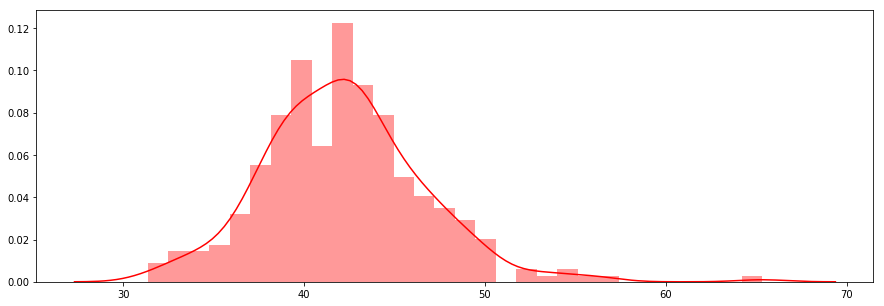

In [15]:
fig,ax=plt.subplots(1,1,figsize=(15,5))
features = data.columns
sns.distplot(data[features].mean(axis=1),kde=True,bins=30,color='red')

### Plot with respect to Standard Deviation per Row

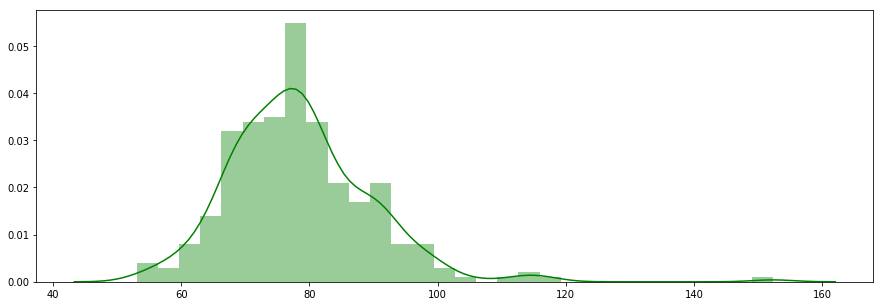

In [16]:
fig,ax=plt.subplots(1,1,figsize=(15,5))
features = data.columns
sns.distplot(data[features].std(axis=1),kde=True,bins=30,color='green')

## Part2: Data Cleaning

### Handling Missing Data

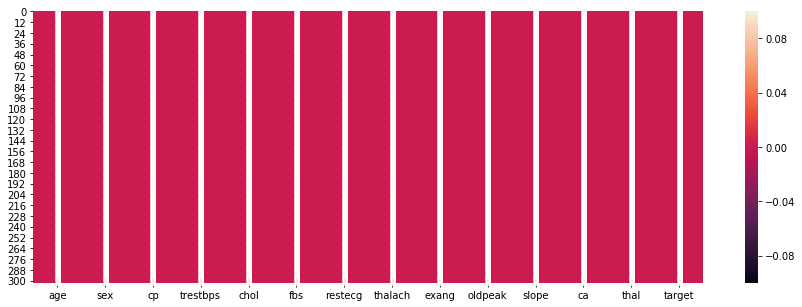

In [17]:
fig,ax=plt.subplots(figsize=(15,5))
sns.heatmap(data.isnull(), annot=True)

THAT'S Good. **No Missing Values**

Let's see **correlation between different features**

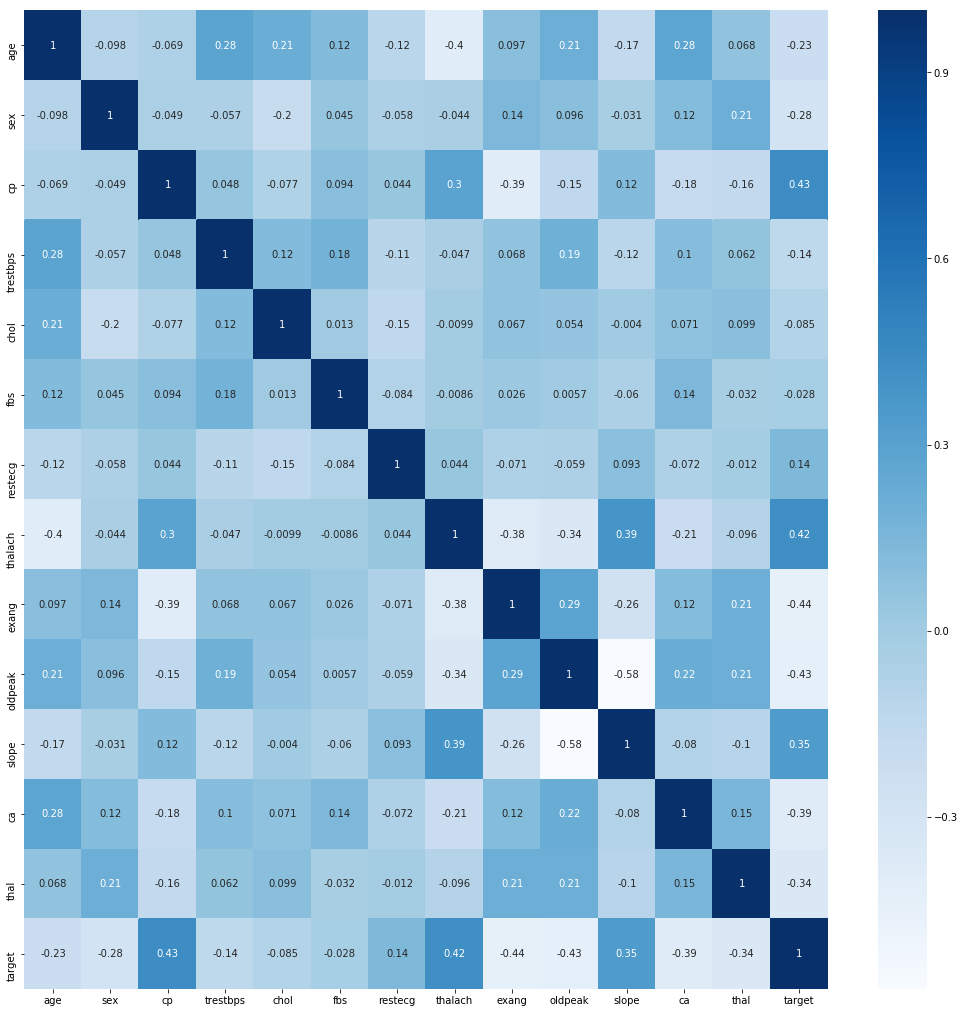

In [18]:
fig=plt.figure(figsize=(18,18))
sns.heatmap(data.corr(), annot= True, cmap='Blues')

Based on above heatmap we can say **most of the features are in high correlation with each other**.

### Now let's work on each feature conversion

In [19]:
data.sex=data.sex.astype('category')
data.cp=data.cp.astype('category')
data.fbs=data.fbs.astype('category')
data.restecg=data.restecg.astype('category')
data.exang=data.exang.astype('category')
data.ca=data.ca.astype('category')
data.slope=data.slope.astype('category')
data.thal=data.thal.astype('category')

In [20]:
data_label=data['target']
del data['target']
data_label=pd.DataFrame(data_label)

### Creating dummies variables

In [21]:
data=pd.get_dummies(data,drop_first=True)
data.head(),data_label.head()

(   age  trestbps  chol  thalach   ...    ca_4  thal_1  thal_2  thal_3
 0   63       145   233      150   ...       0       1       0       0
 1   37       130   250      187   ...       0       0       1       0
 2   41       130   204      172   ...       0       0       1       0
 3   56       120   236      178   ...       0       0       1       0
 4   57       120   354      163   ...       0       0       1       0
 
 [5 rows x 22 columns],    target
 0       1
 1       1
 2       1
 3       1
 4       1)

### Standardization (To bring each feature at same scale)

In [22]:
from sklearn.preprocessing import StandardScaler
data_scaled=StandardScaler().fit_transform(data)
data_scaled=pd.DataFrame(data=data_scaled, columns=data.columns)

In [23]:
data_scaled.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0.681005,-0.444554,-0.634648,3.489114,2.394438,-1.003306,-0.115663,-0.696631,-0.926766,-0.939142,-0.522599,-0.378677,-0.265841,-0.129532,3.979112,-1.100763,-0.793116
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0.681005,-0.444554,1.575677,-0.286606,-0.417635,0.996705,-0.115663,-0.696631,-0.926766,-0.939142,-0.522599,-0.378677,-0.265841,-0.129532,-0.251312,0.908461,-0.793116
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,-1.468418,2.249444,-0.634648,-0.286606,-0.417635,-1.003306,-0.115663,-0.696631,-0.926766,1.064802,-0.522599,-0.378677,-0.265841,-0.129532,-0.251312,0.908461,-0.793116
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0.681005,2.249444,-0.634648,-0.286606,-0.417635,0.996705,-0.115663,-0.696631,-0.926766,1.064802,-0.522599,-0.378677,-0.265841,-0.129532,-0.251312,0.908461,-0.793116
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,-1.468418,-0.444554,-0.634648,-0.286606,-0.417635,0.996705,-0.115663,1.435481,-0.926766,1.064802,-0.522599,-0.378677,-0.265841,-0.129532,-0.251312,0.908461,-0.793116


## Part3: Predictive Modeling

### Splittting data into test and train set

In [24]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(data_scaled, data_label, test_size=0.25,
                                             stratify=data_label,random_state=967834)

### Importing ML libraries

In [25]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### Evalutation metrics to check model performance

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

### Cross validation helper function

In [27]:
def CrossVal(dataX,dataY,mode,cv=5):
    score=cross_val_score(mode,dataX , dataY, cv=cv, scoring='accuracy')
    return(np.mean(score))

### Function to plot ROC and Precision Recall Curve 

In [28]:
def plotting(true,pred):
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    precision,recall,threshold = precision_recall_curve(true,pred[:,1])
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title("Average Precision Score : {}".format(average_precision_score(true,pred[:,1])))
    fpr,tpr,threshold = roc_curve(true,pred[:,1])
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')

### a)Stochastic Gradient Descent 

Accuracy is :  0.8273956960913482


Text(0.5, 1.0, 'F1 Score = 0.8314606741573034')

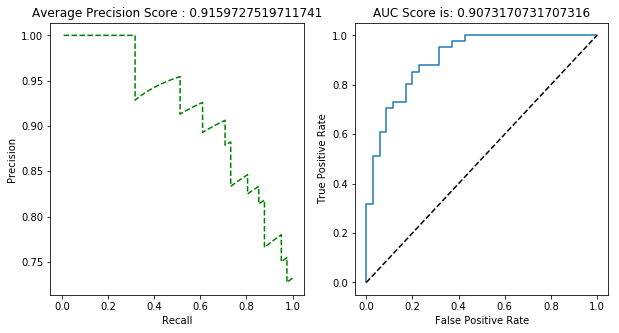

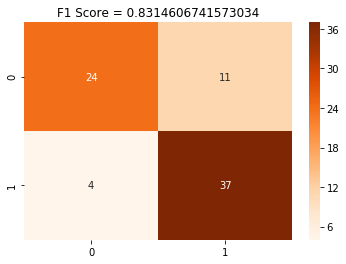

In [29]:
sgd=SGDClassifier(tol=0.00001, random_state=34213,loss='log', penalty= "l2", alpha=0.2)
score_sgd=CrossVal(Xtrain,Ytrain,sgd)
print("Accuracy is : ",score_sgd)
sgd.fit(Xtrain,Ytrain)
plotting(Ytest,sgd.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,sgd.predict(Xtest)), annot= True, cmap='Oranges')
sgd_f1=f1_score(Ytest,sgd.predict(Xtest))
plt.title('F1 Score = {}'.format(sgd_f1))

### b) K-Nearest Neighbors

Accuracy is :  0.8406368028107158


Text(0.5, 1.0, 'F1 Score = 0.8372093023255814')

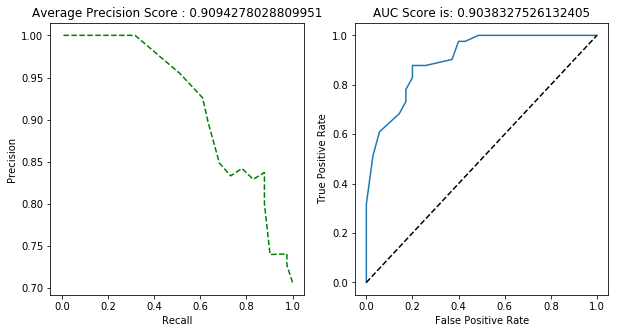

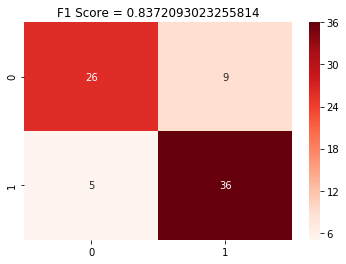

In [30]:
k=KNeighborsClassifier(algorithm='auto', n_neighbors= 21)
score_k=CrossVal(Xtrain,Ytrain,k)
print("Accuracy is : ",score_k)
k.fit(Xtrain,Ytrain)
plotting(Ytest,k.predict_proba(Xtest))


fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,k.predict(Xtest)), annot= True, cmap='Reds')
k_f1=f1_score(Ytest,k.predict(Xtest))
plt.title('F1 Score = {}'.format(k_f1))

### c) Logistic Regression

Accuracy is :  0.8231400966183575


Text(0.5, 1.0, 'F1 Score = 0.8539325842696629')

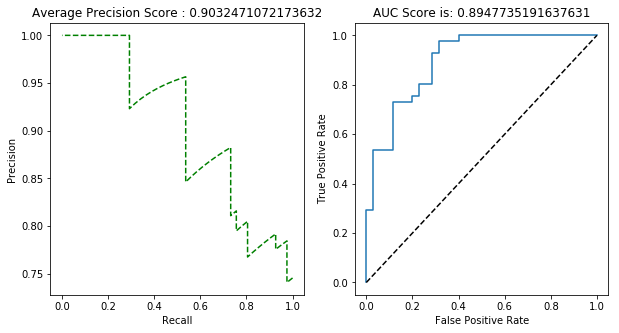

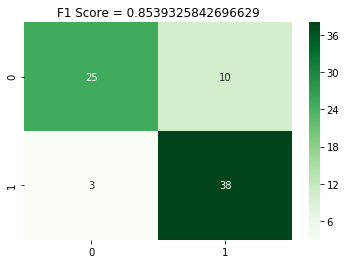

In [31]:
lr=LogisticRegression(class_weight='balanced', tol=0.00001)
score_lr=CrossVal(Xtrain,Ytrain,lr)
print("Accuracy is : ",score_lr)
lr.fit(Xtrain,Ytrain)
plotting(Ytest,lr.predict_proba(Xtest))


fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,lr.predict(Xtest)), annot= True, cmap='Greens')
lr_f1=f1_score(Ytest,lr.predict(Xtest))
plt.title('F1 Score = {}'.format(lr_f1))

### d) Decision Tree Classifier

Accuracy is :  0.7618884497145366


Text(0.5, 1.0, 'F1 Score = 0.7857142857142858')

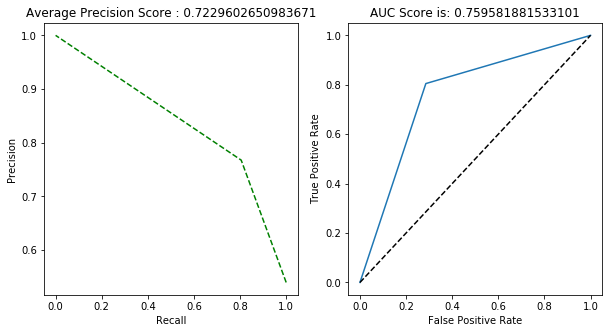

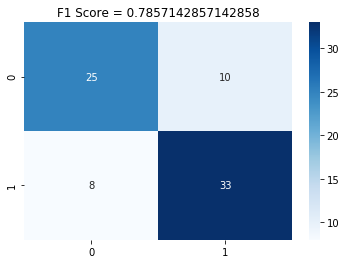

In [32]:
dtc=DecisionTreeClassifier()
score_dtc=CrossVal(Xtrain,Ytrain,dtc)
print("Accuracy is : ",score_dtc)
dtc.fit(Xtrain,Ytrain)
plotting(Ytest,dtc.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,dtc.predict(Xtest)), annot= True, cmap='Blues')

dtc_f1=f1_score(Ytest,dtc.predict(Xtest))
plt.title('F1 Score = {}'.format(dtc_f1))

### e) Support vector machine

Accuracy is :  0.8102064119455423


Text(0.5, 1.0, 'F1 Score = 0.8048780487804877')

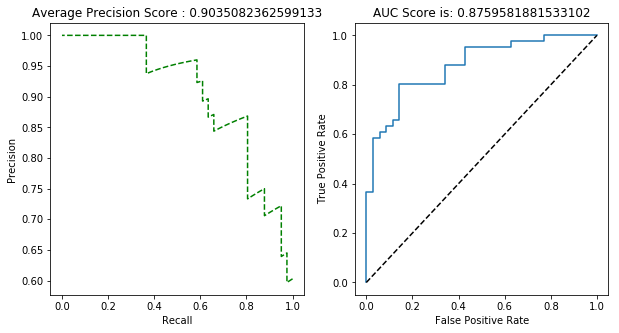

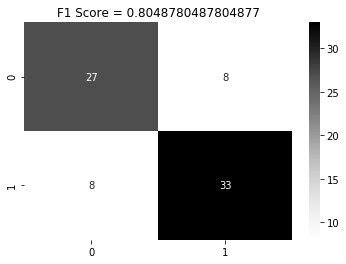

In [33]:
svc=SVC(C=0.2,probability=True,kernel='rbf',gamma=0.1)
score_svc=CrossVal(Xtrain,Ytrain,svc)
print("Accuracy is : ",score_svc)
svc.fit(Xtrain,Ytrain)
plotting(Ytest,svc.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,svc.predict(Xtest)), annot= True, cmap='Greys')
svc_f1=f1_score(Ytest,svc.predict(Xtest))
plt.title('F1 Score = {}'.format(svc_f1))

### f) Random Forest Classifier

Accuracy is: 0.8144532279314888


Text(0.5, 1.0, 'F1 Score = 0.7951807228915663')

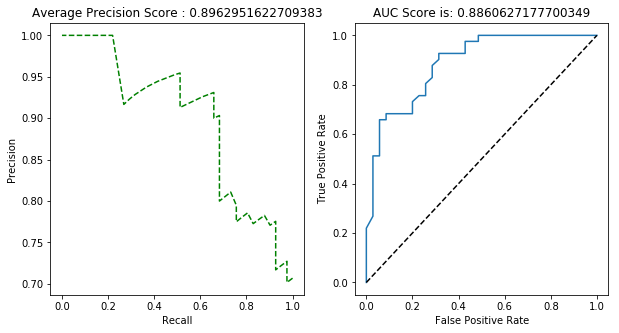

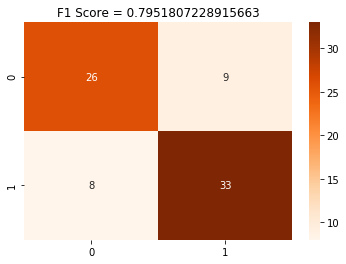

In [34]:
rf=RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=1296)
score_rf= CrossVal(Xtrain,Ytrain,rf)
print('Accuracy is:',score_rf)
rf.fit(Xtrain,Ytrain)
plotting(Ytest,rf.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,rf.predict(Xtest)), annot= True, cmap='Oranges')

rf_f1=f1_score(Ytest,rf.predict(Xtest))
plt.title('F1 Score = {}'.format(rf_f1))

### g) Extra Trees Classifier

Accuracy is: 0.8233421168203776


Text(0.5, 1.0, 'F1 Score = 0.8433734939759037')

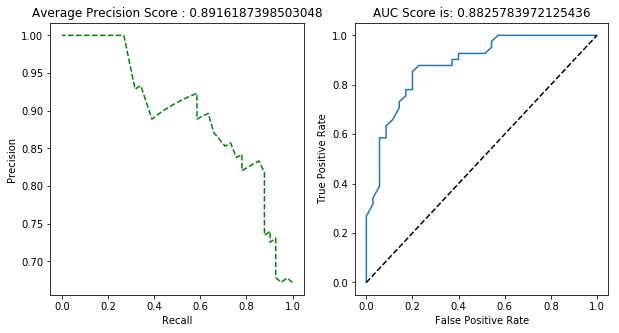

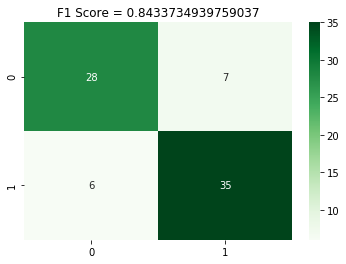

In [35]:
etc=ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state=728964)
score_etc= CrossVal(Xtrain,Ytrain,etc)
print('Accuracy is:',score_etc)
etc.fit(Xtrain,Ytrain)
plotting(Ytest,etc.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,etc.predict(Xtest)), annot= True, cmap='Greens')

etc_f1=f1_score(Ytest,etc.predict(Xtest))
plt.title('F1 Score = {}'.format(etc_f1))

### h) Ada Boost Classifier

Accuracy is: 0.8141545893719806


Text(0.5, 1.0, 'F1 Score = 0.8372093023255814')

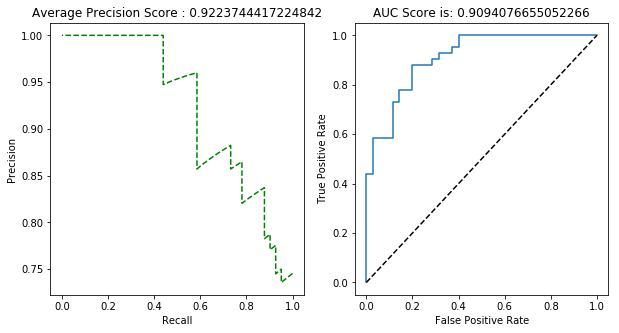

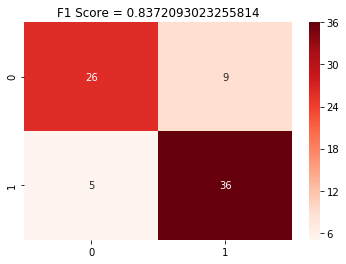

In [36]:
abc=AdaBoostClassifier(sgd,n_estimators=100, random_state=2394, learning_rate=0.012)
score_ada= CrossVal(Xtrain,Ytrain,abc)
print('Accuracy is:',score_ada)
abc.fit(Xtrain,Ytrain)
plotting(Ytest,abc.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,abc.predict(Xtest)), annot= True, cmap='Reds')

abc_f1=f1_score(Ytest,abc.predict(Xtest))
plt.title('F1 Score = {}'.format(abc_f1))

### i) Gradient Boosting Classifier 

Accuracy is: 0.7836275801493192


Text(0.5, 1.0, 'F1 Score = 0.7954545454545454')

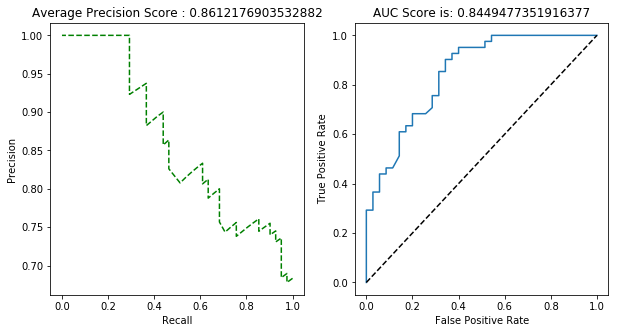

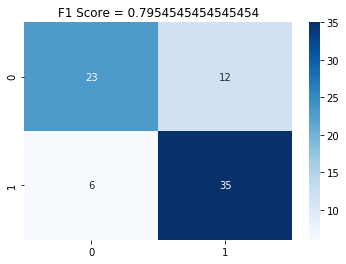

In [37]:
gbc=GradientBoostingClassifier(n_estimators=100, random_state=12963, learning_rate = 0.01)
score_gbc= CrossVal(Xtrain,Ytrain,gbc)
print('Accuracy is:',score_gbc)
gbc.fit(Xtrain,Ytrain)
plotting(Ytest,gbc.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,gbc.predict(Xtest)), annot= True, cmap='Blues')

gbc_f1=f1_score(Ytest,gbc.predict(Xtest))
plt.title('F1 Score = {}'.format(gbc_f1))

### j) Bagging Classifier 

Accuracy is: 0.7836275801493192


Text(0.5, 1.0, 'F1 Score = 0.8048780487804877')

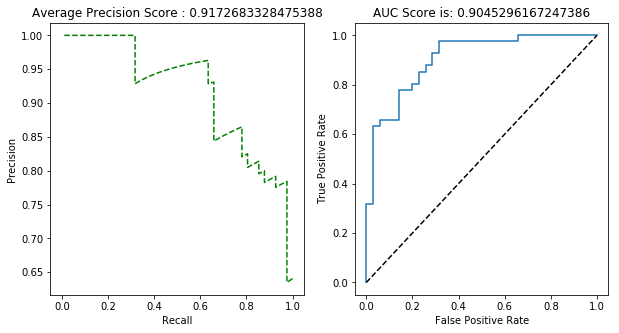

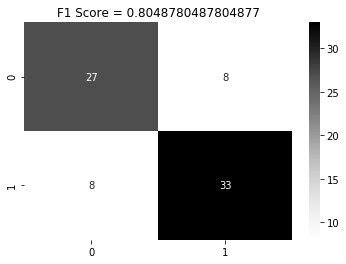

In [38]:
bc=BaggingClassifier(lr,max_samples=31, bootstrap=True, n_jobs= -1, )
score_bc= CrossVal(Xtrain,Ytrain,gbc)
print('Accuracy is:',score_bc)
bc.fit(Xtrain,Ytrain)
plotting(Ytest,bc.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,bc.predict(Xtest)), annot= True, cmap='Greys')

bc_f1=f1_score(Ytest,bc.predict(Xtest))
plt.title('F1 Score = {}'.format(bc_f1))

### IMOPORTANT FEATURE


Text(0.5, 1.0, 'Feature Importance')

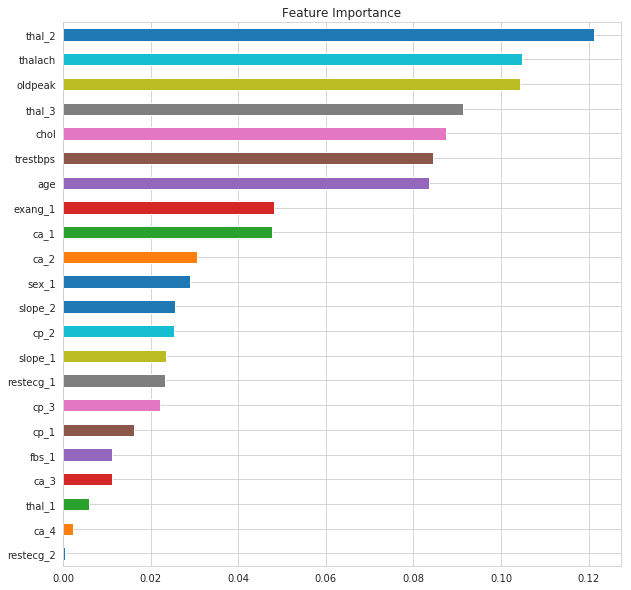

In [39]:
fig= plt.figure(figsize=(10,10))
important=pd.Series(rf.feature_importances_, index=Xtrain.columns)
sns.set_style('whitegrid')
important.sort_values().plot.barh()
plt.title('Feature Importance')

So after modeling we can say that **thal_2 and oldeak** are most important feature in prediction

### Model accuracy plot

Text(0.5, 1.0, 'Model Accracy')

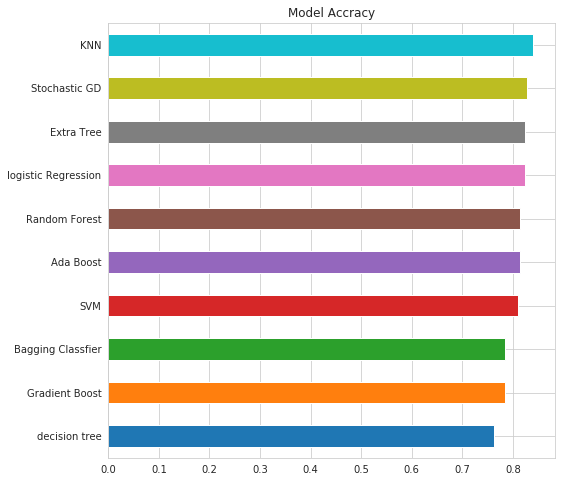

In [40]:
model_accuracy = pd.Series(data=[score_sgd, score_k, score_lr, score_dtc, score_svc, score_rf, score_etc, 
                           score_ada, score_gbc, score_bc], index=['Stochastic GD','KNN','logistic Regression',
                                                                  'decision tree', 'SVM', 'Random Forest',
                                                                  'Extra Tree', 'Ada Boost' , 'Gradient Boost', 
                                                                  'Bagging Classfier'])
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accracy')

If you consider accuracy then K-Nearest Neighbours are doing better than other ML algorithms. 

But for Classification task **ACCURACY is not important**.  Instead of accuracy model should be judged on basis of **AUC (Area under curve), ROC CURVE, High Precision and High Recall values**. **F1 score** also play imporant role which is equals to **2/(1/precision + 1/Recall) score**

#### AS FURTHER COMPARISON BETWEEN MODEL PLOTTING F1 SCORE

Text(0.5, 1.0, 'Model F1 Score Comparison')

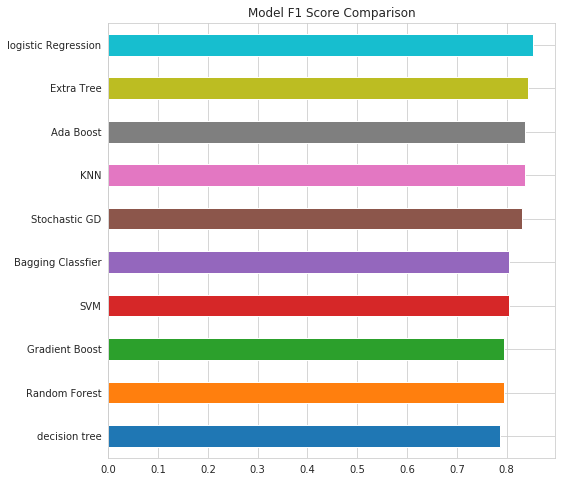

In [41]:
model_f1_score = pd.Series(data=[sgd_f1, k_f1, lr_f1, dtc_f1, svc_f1, rf_f1, etc_f1, 
                           abc_f1, gbc_f1, bc_f1], index=['Stochastic GD','KNN','logistic Regression',
                                                                  'decision tree', 'SVM', 'Random Forest',
                                                                  'Extra Tree', 'Ada Boost' , 'Gradient Boost', 
                                                                  'Bagging Classfier'])
fig= plt.figure(figsize=(8,8))
model_f1_score.sort_values().plot.barh()
plt.title('Model F1 Score Comparison')

### Stay tuned for more updates. And don't forget to give an upvote if you like it 

### Feel free to ask any doubt/question/ or to give any suggestion :)